# Data preparation

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

## Plotting
import matplotlib.pyplot as plt

# Basic cleaning
## Variance
from sklearn.feature_selection import VarianceThreshold


## Data cleaning

### Basic data cleaning

In [2]:
# Load datasets

# Load Oil spill data
path_oil_spill = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
oil_spill_data=pd.read_csv(path_oil_spill,header=None)
display(f"Shape of oil_spill_data : {oil_spill_data.shape}")

# Load Iris Flower dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
display(f"Shape of iris_data : {iris_data.shape}")

'Shape of oil_spill_data : (937, 50)'

'Shape of iris_data : (150, 5)'

In [3]:
# Copy of datasets
oil_spill_data_copy = oil_spill_data.copy()
iris_data_copy = iris_data.copy()

#### Identify Columns That Contain a Single Value

In [4]:
# Summurize the number of unique values in each column
oil_spill_data.nunique();

#### Delete Columns That Contain a Single Value

In [5]:
# Create a function to drop columns that have a single value
def drop_single_value_columns(df : pd.DataFrame) -> pd.DataFrame:
        """
    Drop columns with a single unique value 
    Args:
        df (DataFrame): Raw data
    Returns:
        df (DataFrame) with no single value columns
    """ 
        print(f"Shape BEFORE dropping single value columns: {df.shape}") 
        
        # get number of unique values for each column 
        counts = df.nunique()
        
        # record columns to delete (i.e columns that only contain a unique value)
        to_del = [i for i,v in enumerate(counts) if v == 1]
    
        print(f"Names of single value columns: {to_del}") 
        
        # drop useless columns 
        df.drop(to_del, axis=1, inplace=True) 
        
        print(f"Shape AFTER dropping single value columns: {df.shape}") 
        return df

In [6]:
oil_spill_data = drop_single_value_columns(oil_spill_data)

Shape BEFORE dropping single value columns: (937, 50)
Names of single value columns: [22]
Shape AFTER dropping single value columns: (937, 49)


#### Consider Columns That Have Very Few Values

This does not mean that these rows and columns should be deleted, but they require further attention. <br>
For example: <br>
•	Perhaps the unique values can be encoded as ordinal values? <br>
•	Perhaps the unique values can be encoded as categorical values? <br>
•	Perhaps compare model skill with each variable removed from the dataset?


In [7]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

In [8]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage(df : pd.DataFrame):
    """
    Print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
    Args:
        - df (DataFrame): Raw data
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        print(f"{i}, {num}, {round(percentage,1)}%")

In [9]:
show_unique_values_percentage(oil_spill_data)

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [10]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage_below_threshold(df : pd.DataFrame,threshold : float):
    """
    Print index, number of unique values (below a threshold) and percentage of unique values per column in regard to total number of rows per column
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        if percentage < threshold:
            print(f"{i}, {num}, {round(percentage,1)}%")

In [11]:
show_unique_values_percentage_below_threshold(oil_spill_data, 1.0)

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [12]:
# Create a function to get columns where number of unique values is less than X% of the rows of the entire considered dataset
def get_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> list:
    """
    Get columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    cols_with_few_values = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    return cols_with_few_values

In [13]:
get_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]

In [14]:
# Create a function to drop columns where number of unique values is less than X% of the rows of the entire considered dataset
def drop_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> pd.DataFrame:
    """
    Drop columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """ 
    print(f"Shape BEFORE dropping few value columns: {df.shape}")
    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    print(f"Names of columns with few values: {to_del}") 
    
    # drop useless columns 
    df.drop(to_del, axis=1, inplace=True) 
    
    print(f"Shape AFTER dropping columns with few values: {df.shape}") 
    return df

In [15]:
oil_spill_data = drop_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

Shape BEFORE dropping few value columns: (937, 50)
Names of columns with few values: [21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
Shape AFTER dropping columns with few values: (937, 39)


#### Remove columns that have a low variance

In [16]:
# explore the effect of the variance thresholds on the number of selected features from numpy import arange 
def explore_variance_threshold_effects(df : pd.DataFrame, range : np.arange):
    """
    Explore the effect of the variance thresholds on the number of selected features from numpy import arange 
    Args:
        - df (DataFrame): Raw data
        - range (np.arange) : variance range to check
    Returns:
        - Print number of features whose variance is over the considered threshold
        - Plot the number of features whose variance is over the considered threshold
    """ 
    
    # apply transform with each threshold 
    results = list() 

    for t in range: 
        # define the transform 
        transform = VarianceThreshold(threshold=t) 
        
        # transform the input data 
        df_sel = transform.fit_transform(df) 
        
        # determine the number of input features 
        n_features = df_sel.shape[1] 
        
        print(f">Threshold={round(t,2)}, Features={n_features}")
        
        # store the result 
        results.append(n_features) 
        
    # plot the threshold vs the number of selected features 
    plt.plot(range, results) 
    plt.show()

(937, 38) (937,)
>Threshold=0.0, Features=38
>Threshold=0.05, Features=29
>Threshold=0.1, Features=28
>Threshold=0.15, Features=28
>Threshold=0.2, Features=28
>Threshold=0.25, Features=28
>Threshold=0.3, Features=28
>Threshold=0.35, Features=28
>Threshold=0.4, Features=28
>Threshold=0.45, Features=26
>Threshold=0.5, Features=25


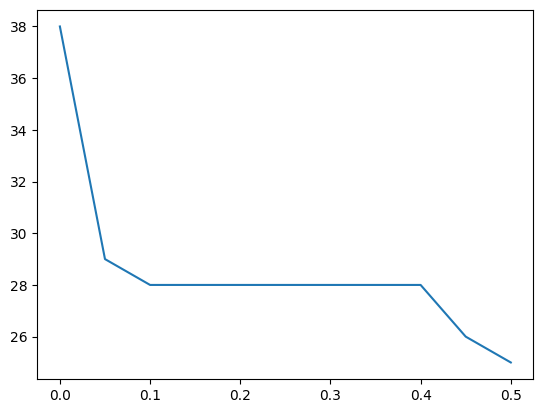

In [17]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape, y.shape) 

# define variance thresholds to check 
thresholds = np.arange(0.0, 0.55, 0.05) 

explore_variance_threshold_effects(X, thresholds)

In [18]:
# Remove features whose variance is lower than threshold
threshold = 0.4

# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape) 

# define the transform 
transform = VarianceThreshold(threshold=threshold) 

# transform the input data 
X_sel = transform.fit_transform(X) 

print(X_sel.shape) 

(937, 38)
(937, 28)


#### Identify rows that contain duplicate data

In [19]:
# Retrieve original data
iris_data = iris_data_copy

In [20]:
# calculate duplicates 
dups = iris_data.duplicated() 

# report if there are any duplicates 
print(dups.any()) 

# list all duplicate rows 
print(iris_data[dups])

True
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     target  
142       2  


#### Delete rows thtat contain duplicate data

In [21]:
def check_duplicates(df):
    """
    Counts duplicated rows. If any, function drops duplicated rows.
    Args:
        df (DataFrame): Raw data
    Returns:
        - df (Dataframe) without duplicated rows, a string otherwise.
    """

    # Check number of rows before removing duplicates
    print(f"Number of rows : {len(df)}")

    # Compute the number of duplicated rows
    num_dups = df.duplicated().sum()
    
    print(f"Number of duplicated rows : {num_dups}")

    if df.duplicated().any():
        # Remove duplicates
        df_no_duplicates = df.drop_duplicates()
        print(f"{num_dups} duplicated row(s) removed")
        return df_no_duplicates
    else:
        return "No duplicated rows found !"    

In [22]:
iris_data_no_dups = check_duplicates(iris_data)

Number of rows : 150
Number of duplicated rows : 1
1 duplicated row(s) removed


### Outlier Identification and Removal

In [23]:
# generate gaussian data 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 
# summarize 
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=50.049 stdv=4.994


<Axes: >

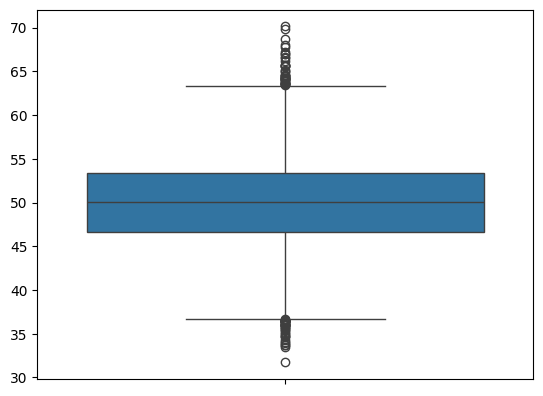

In [24]:
# Plot boxplot of data
fig, ax = plt.subplots()
sns.boxplot(data=data, ax=ax)

#### Standard Deviation Method 

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. 

In [25]:
# If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
def identify_outliers_std_dev_method(data : np.ndarray):
    """
    If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """

    # calculate summary statistics 
    data_mean, data_std = mean(data), std(data) 

    # define outliers 
    cut_off = data_std * 3 
    lower, upper = data_mean - cut_off, data_mean + cut_off 

    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print(f"Identified outliers: {len(outliers)}") 

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print(f"Non-outlier observations: {len(outliers_removed)}")

    return outliers, outliers_removed

So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution. You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions. Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

In [26]:
# identify outliers with standard deviation 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 

# seed the random number generator 
seed(1) 

# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_std_dev_method(data)

Identified outliers: 29
Non-outlier observations: 9971


#### Interquartile Range Method 

In [27]:
# identify outliers with interquartile range 
def identify_outliers_iqr_method(data : np.ndarray):
    """
    A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.
    This function identifies outliers with interquartile range (iqr).
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """
    
    # calculate interquartile range 
    q25, q75 = percentile(data, 25), percentile(data, 75) 
    iqr = q75 - q25 
    print(f"Percentiles: 25th={round(q25,3)}, 75th={round(q75,3)}, IQR={round(iqr,3)}") 
    
    # calculate the outlier cutoff 
    cut_off = iqr * 1.5 
    lower, upper = q25 - cut_off, q75 + cut_off 
    
    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers)) 
    
    # remove outliers 
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))
    
    return outliers, outliers_removed

In [28]:
# identify outliers with interquartile range 
from numpy.random import seed 
from numpy.random import randn 
from numpy import percentile 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_iqr_method(data)

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


#### Automatic Outlier Detection 

In [29]:
# Load Boston Housing Dataset 
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
boston_housing=pd.read_csv(boston_housing,header=None)
display(f"Shape of boston_housing : {boston_housing.shape}")

'Shape of boston_housing : (506, 14)'

In [30]:
# evaluate model on the raw dataset 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements 
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

MAE: 3.417


##### LocalOutlierFactor

In [31]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = LocalOutlierFactor() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


##### IsolationForest 

In [32]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = IsolationForest() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(294, 13) (294,)
MAE: 3.218


### How to Mark and Remove Missing Data

In [33]:
# Load datasets

# Load diabetes data
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

diabetes_data=pd.read_csv(path_diabetes,header=None)
display(f"Shape of diabetes_data : {diabetes_data.shape}")

'Shape of diabetes_data : (768, 9)'

In [34]:
# Copy of datasets
diabetes_data_copy = diabetes_data.copy()

#### Mark Missing Values

In [35]:
# Summarize the dataset from pandas import read_csv
print(diabetes_data.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

This is useful. We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

In [36]:
# example of summarizing the number of missing values for each variable from pandas import read_csv
# count the number of missing values for each column 
num_missing = (diabetes_data[[1,2,3,4,5]] == 0).sum()

# report the results 
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN. Values with a NaN value are ignored from operations like sum, count, etc. We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in. After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.

In [37]:
# example of marking missing values with nan values from numpy import nan
 # replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# count the number of nan values in each column 
print(diabetes_data.isnull().sum())


0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


This is a useful summary, as we want to confirm that we have not fooled ourselves somehow.
Below is the same example, except we print the first 20 rows of data.

In [38]:
# example of review data with missing values marked with a nan from numpy import nan
# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# summarize the first 20 rows of data 
print(diabetes_data.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

#### Missing Values Cause Problems

Having missing values in a dataset can cause errors with some machine learning algorithms.
In this section, we will try to evaluate the Linear Discriminant Analysis (LDA) algorithm on the dataset with missing values. This is an algorithm that does not work when there are missing values in the dataset. The example below marks the missing values in the dataset, as we did in the previous section, then attempts to evaluate LDA using 3-fold cross-validation and print the mean accuracy


In [39]:
# # example where missing values cause errors from numpy import nan
# from pandas import read_csv
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# # load the dataset
# diabetes_data = diabetes_data_copy

# # replace '0' values with 'nan'
# diabetes_data[[1,2,3,4,5]] = diabetes_data[[1,2,3,4,5]].replace(0, np.nan) 

# # split dataset into inputs and outputs
# values = diabetes_data.values
# X = values[:,0:8]
# y = values[:,8]

# # define the model
# model  =  LinearDiscriminantAnalysis()

# # define the model evaluation procedure
# cv = KFold(n_splits=3, shuffle=True, random_state=1) 

# # evaluate the model
# result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# # report the mean performance 
# print('Accuracy: %.3f' % result.mean())

Example error message when trying to evaluate a model with missing values.

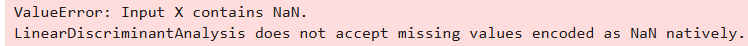

This is as we expect. We are prevented from evaluating an LDA algorithm (and other algorithms) on the dataset with missing values.

#### Remove Rows With Missing Values

The simplest strategy for handling missing data is to remove records that contain a missing value.

In [40]:
# example of removing rows that contain missing values from numpy import nan
from pandas import read_csv 

# load the dataset
diabetes_data = diabetes_data_copy

# summarize the shape of the raw data
print(diabetes_data.shape)

# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# drop rows with missing values 
diabetes_data.dropna(inplace=True)

# summarize the shape of the data with missing rows removed 
print(diabetes_data.shape)

(768, 9)
(392, 9)


We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [41]:
# evaluate model on data after rows with missing data are removed from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# load the dataset
diabetes_data = diabetes_data_copy

# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# drop rows with missing values 
diabetes_data.dropna(inplace=True)

# split dataset into inputs and outputs 
values = diabetes_data.values
X = values[:,0:8]
y = values[:,8]

# define the model
model  =  LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1) 

# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 

# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


**Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.**

### How to Use Statistical Imputation

In [42]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [43]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [44]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [45]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [46]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [47]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [48]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. In this section, we will explore how to effectively use the SimpleImputer class.

In [49]:
# statistical imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print(f"Missing:  {sum(np.isnan(X).flatten())}") 

# define imputer
imputer = SimpleImputer(strategy='mean') 

# fit on the dataset
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print(f"Missing:  {sum(np.isnan(Xtrans).flatten())}") 

Missing:  1605
Missing:  0


#### SimpleImputer and Model Evaluation

It is a good practice to evaluate machine learning models on a dataset using k-fold cross- validation. **To correctly apply statistical missing data imputation and avoid data leakage**, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

This can be achieved by creating a modeling pipeline where the first step is the statistical imputation, then the second step is the model. This can be achieved using the Pipeline class. For example, the Pipeline below uses a SimpleImputer with a ‘mean’ strategy, followed by a random forest model.

In [50]:
# evaluate mean imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)]) 

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(f'Mean Accuracy: {round(mean(scores),3)} ({round(std(scores),3)})')

Mean Accuracy: 0.861 (0.052)


#### Comparing Different Imputed Statistics

How do we know that using a ‘mean’ statistical strategy is good or best for this dataset? The answer is that we don’t and that it was chosen arbitrarily. We can design an experiment to test each statistical strategy and discover what works best for this dataset, comparing the mean, median, mode (most frequent), and constant (0) strategies. The mean accuracy of each approach can then be compared. The complete example is listed below.

>mean 0.870 (0.055)
>median 0.866 (0.059)
>most_frequent 0.871 (0.059)
>constant 0.882 (0.048)


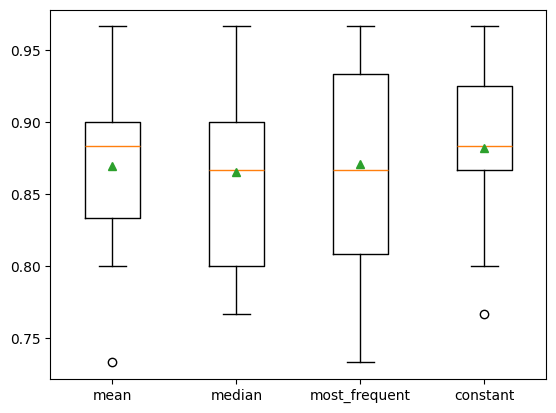

In [51]:
# compare statistical imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant'] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()


#### SimpleImputer Transform When Making a Prediction

In [52]:
# constant imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])

# fit the model 
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2


### How to Use KNN Imputation

In [53]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [54]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [55]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [56]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [57]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [58]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [59]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### KNNImputer Data Transform

In [60]:
# knn imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer 

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten())) 

# define imputer
imputer = KNNImputer() 

# fit on the dataset 
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print('Missing: %d'  % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### KNNImputer and Model Evaluation

In [61]:
# evaluate knn imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier() 
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.866 (0.057)


#### KNNImputer and Different Number of Neighbors

>1 0.861 (0.056)
>3 0.863 (0.047)
>5 0.867 (0.055)
>7 0.868 (0.055)
>9 0.866 (0.058)
>15 0.861 (0.056)
>18 0.866 (0.053)
>21 0.858 (0.060)


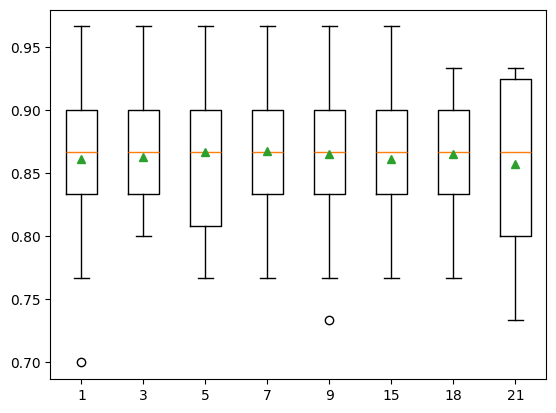

In [62]:
# compare knn imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    # store results
    results.append(scores)  
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()

#### KNNImputer Transform When Making a Prediction

In [63]:
# knn imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])

# fit the model 
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2


### How to Use Iterative Imputation

In [53]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [54]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [55]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [56]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [57]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [58]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [59]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### IterativeImputer Data Transform

In [64]:
# iterative imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten())) 

# define imputer
imputer = IterativeImputer() 

# fit on the dataset 
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### IterativeImputer and Model Evaluation

In [65]:
# evaluate iterative imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier() 
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.868 (0.051)


#### IterativeImputer and Different Imputation Order

>ascending 0.866 (0.050)
>descending 0.870 (0.052)
>roman 0.877 (0.057)
>arabic 0.870 (0.053)
>random 0.868 (0.055)


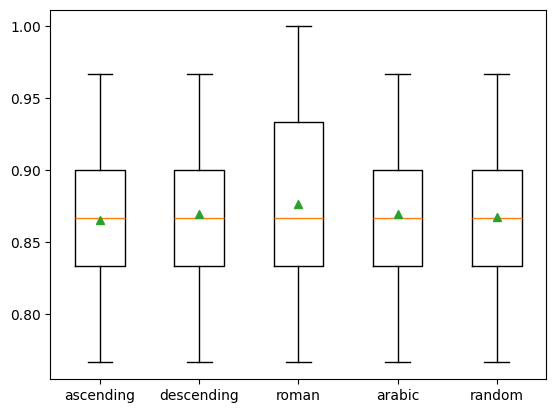

In [66]:
# compare iterative imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random'] 
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()

#### IterativeImputer and Different Number of Iterations

In [70]:
len(results)

45

>1 0.870 (0.049)
>2 0.870 (0.050)
>3 0.873 (0.050)
>4 0.870 (0.048)
>5 0.869 (0.053)
>6 0.870 (0.050)
>7 0.876 (0.052)
>8 0.862 (0.058)
>9 0.873 (0.051)
>10 0.868 (0.049)
>11 0.868 (0.053)
>12 0.862 (0.056)
>13 0.871 (0.052)
>14 0.872 (0.047)
>15 0.869 (0.050)
>16 0.873 (0.047)
>17 0.871 (0.053)
>18 0.871 (0.058)
>19 0.874 (0.053)
>20 0.876 (0.054)


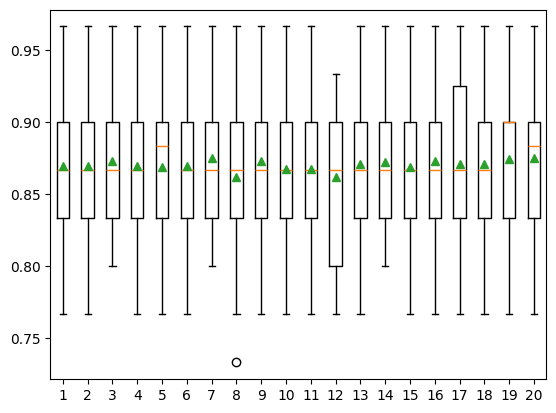

In [71]:
# compare iterative imputation number of iterations for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = [str(i) for i in range(1, 21)] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()


#### IterativeImputer Transform When Making a Prediction

In [72]:
# iterative imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())]) 

# fit the model
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2
